In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
raw_df=pd.read_csv('hacktrain.csv')

In [145]:
nvdi_columns=raw_df.columns.tolist()[29:3:-1]
raw_df=raw_df[['ID','class']+nvdi_columns]
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(raw_df, test_size=0.2,stratify=raw_df['class'],random_state=42)

In [146]:
raw_df.columns

Index(['ID', 'class', '20140101_N', '20140117_N', '20140202_N', '20140218_N',
       '20140322_N', '20140407_N', '20140423_N', '20140509_N', '20140525_N',
       '20140610_N', '20140626_N', '20140813_N', '20140930_N', '20141016_N',
       '20141101_N', '20141117_N', '20150109_N', '20150125_N', '20150210_N',
       '20150226_N', '20150314_N', '20150330_N', '20150415_N', '20150501_N',
       '20150517_N', '20150602_N'],
      dtype='object')

In [147]:
train_df['class']

,class
1157,forest
5776,forest
4327,forest
4053,forest
189,forest
...,...
2688,forest
1113,forest
7489,farm
374,forest


In [148]:
monthly_features = {}
for col in nvdi_columns:
    month = int(col[4:6]) # Extract month from 'yyyymmdd_N'
    if month not in monthly_features:
        monthly_features[month] = []
    monthly_features[month].append(col)

# Sort the months for consistent column order
sorted_months = sorted(monthly_features.keys())

for month in sorted_months:
    cols = monthly_features[month]
    train_df[f'month_{month}_mean'] = train_df[cols].mean(axis=1)
    val_df[f'month_{month}_mean'] = val_df[cols].mean(axis=1)

display(train_df.head())

,ID,class,20140101_N,20140117_N,20140202_N,20140218_N,20140322_N,20140407_N,20140423_N,20140509_N,...,month_1_mean,month_2_mean,month_3_mean,month_4_mean,month_5_mean,month_6_mean,month_8_mean,month_9_mean,month_10_mean,month_11_mean
1157,1473,forest,660.148,6916.080,NaN,NaN,623.797,6860.630,NaN,3758.720,...,3897.4505,7491.075000,3214.535667,6858.685000,4579.672500,6701.003333,786.481,7578.650,NaN,5274.9200
5776,7040,forest,1506.060,391.994,7010.88,587.826,7706.090,350.188,7340.090,681.913,...,780.5510,2873.258667,6773.216667,2655.018000,4947.938250,1649.398000,1502.780,NaN,884.870,860.8775
4327,5306,forest,554.484,464.197,7099.87,394.197,521.193,306.652,825.455,8201.590,...,903.0075,2937.513250,579.421667,486.257667,6079.180250,3189.986667,2038.510,302.274,814.513,421.6490
4053,4978,forest,7810.920,2092.460,NaN,866.339,7618.120,267.670,2032.580,NaN,...,6366.1475,3102.444000,5693.263333,3281.306667,4907.401667,5111.630000,4135.460,308.086,1232.090,738.3230
189,311,forest,6183.970,1413.960,6852.73,5175.290,537.027,6841.850,6514.110,534.439,...,3881.9000,3619.209000,2502.885667,4669.562000,3262.599667,7639.860000,2222.340,4292.000,303.250,5860.3800


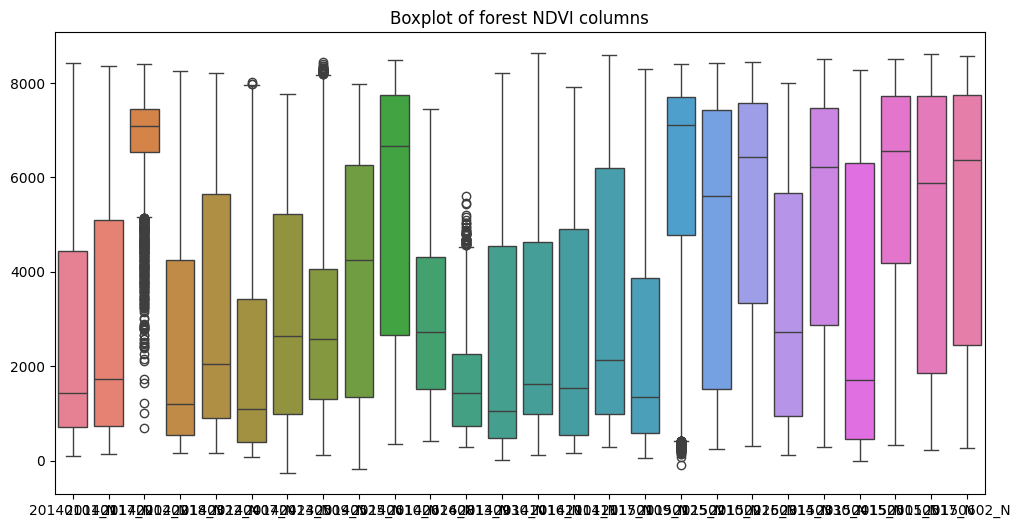

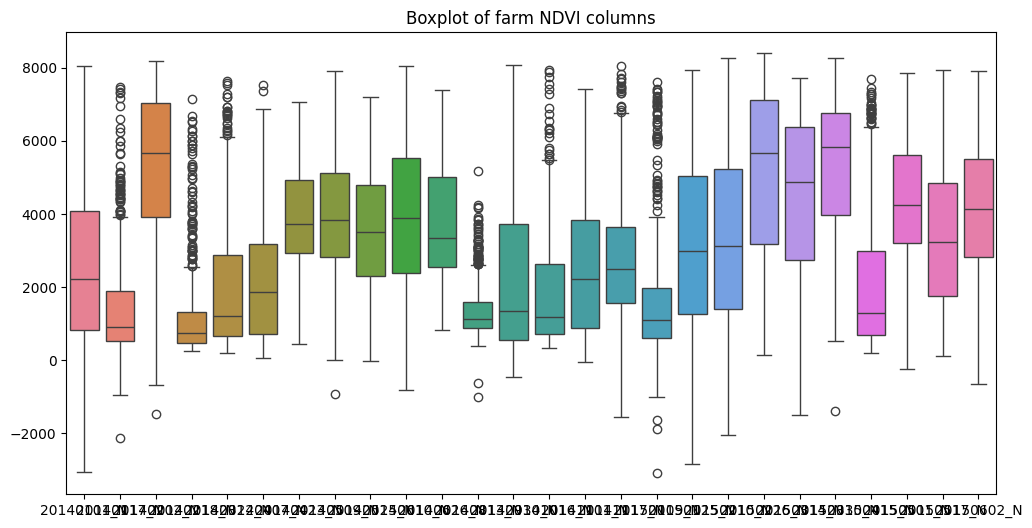

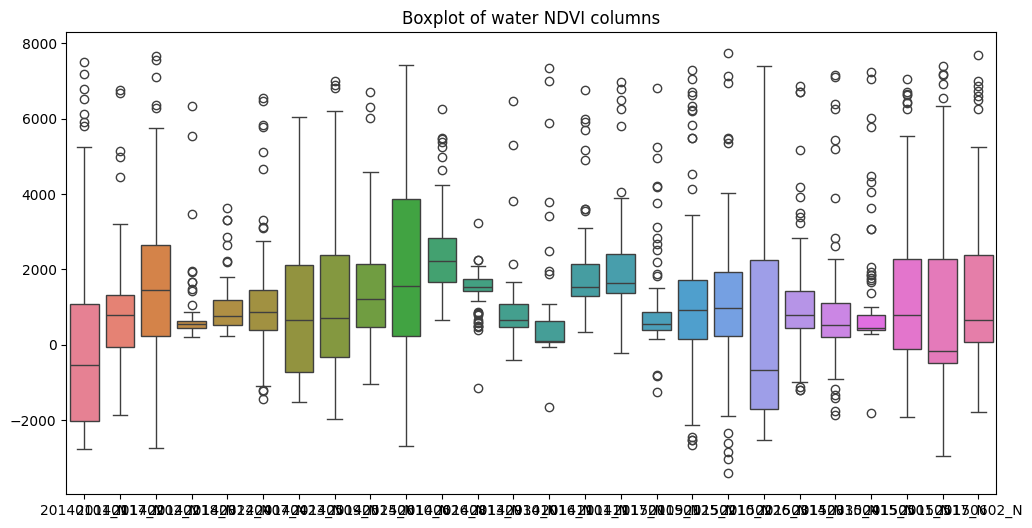

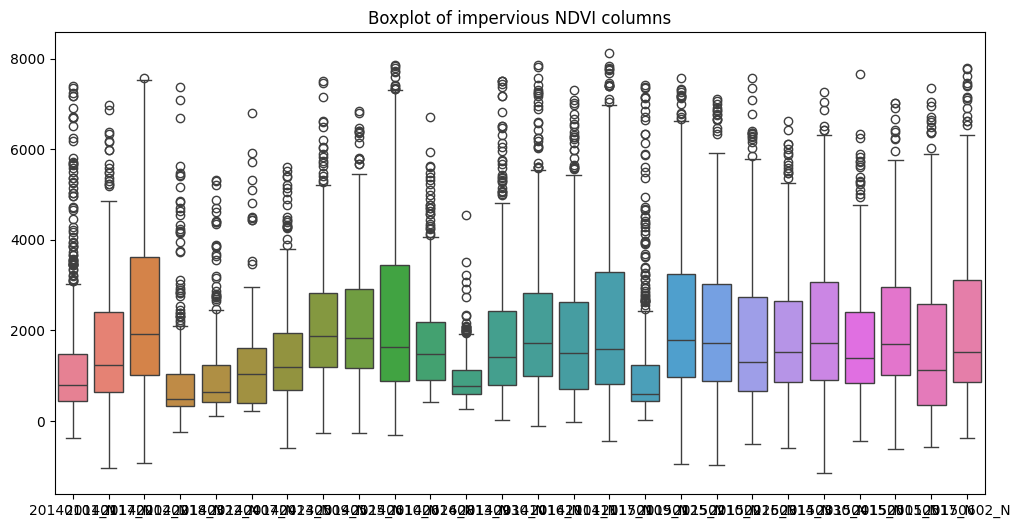

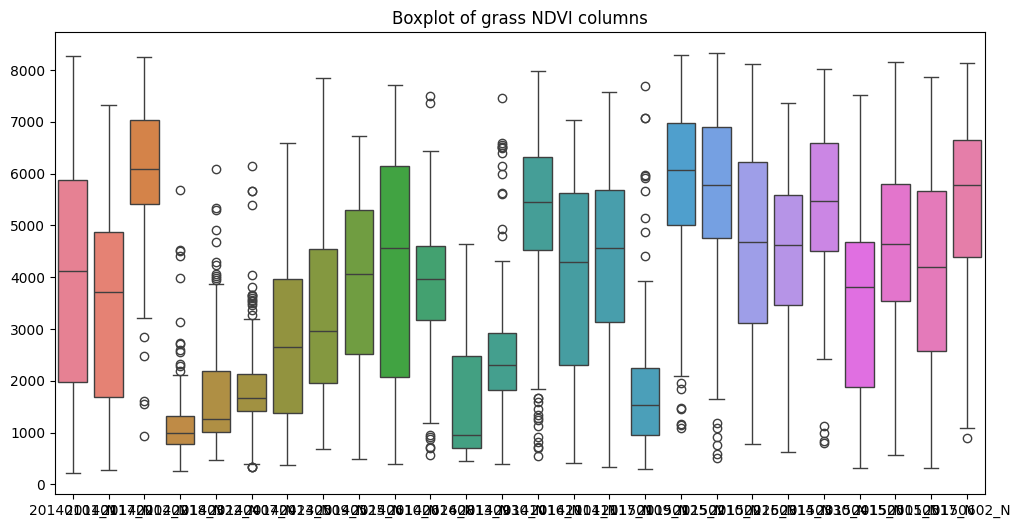

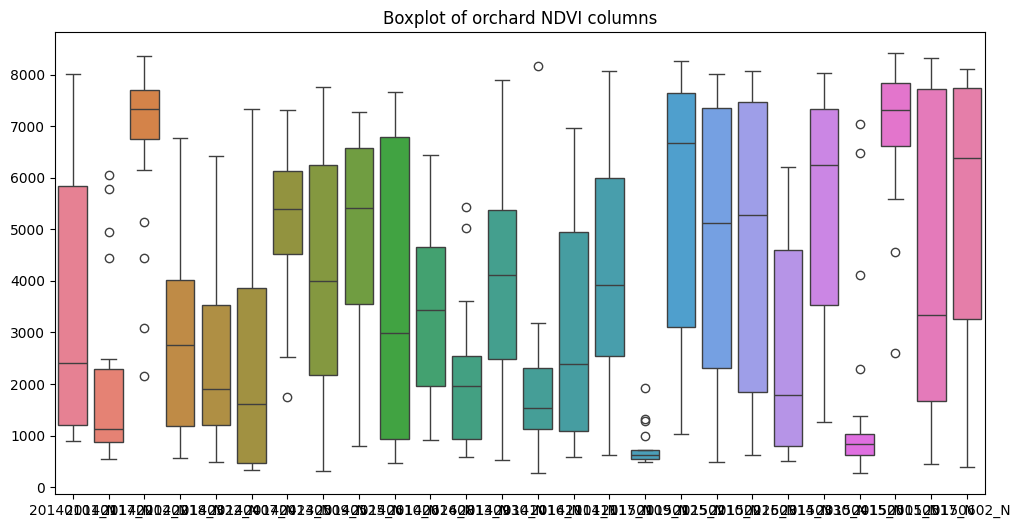

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

for cls in train_df['class'].unique().tolist():
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=train_df[train_df['class']==cls][nvdi_columns])  # sample if too large
    plt.title(f"Boxplot of {cls} NDVI columns")
    plt.show()

In [150]:
for cls in train_df['class'].unique():
    class_mask = train_df['class'] == cls
    for col in nvdi_columns:
        q1 = train_df.loc[class_mask, col].quantile(0.25)
        q3 = train_df.loc[class_mask, col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        train_df.loc[class_mask, col] = train_df.loc[class_mask, col].where(
            train_df.loc[class_mask, col].between(lower, upper), np.nan)
        val_class_mask = val_df['class'] == cls
        val_df.loc[val_class_mask, col] = val_df.loc[val_class_mask, col].where(
            val_df.loc[val_class_mask, col].between(lower, upper), np.nan)

In [151]:
from collections import defaultdict

month_to_season={
    12:"Winter",1:"Winter",2:"Winter",
    3:"Spring",4:"Spring",5:"Spring",
    6:"Summer",7:"Summer",8:"Summer",
    9:"Fall",10:"Fall",11:"Fall"
}
season_features=defaultdict(list)

for col in nvdi_columns:
  month=int(col[4:6])
  season=month_to_season.get(month)
  season_features[season].append(col)

In [152]:
season_features

defaultdict(list,
            {'Winter': ['20140101_N',
              '20140117_N',
              '20140202_N',
              '20140218_N',
              '20150109_N',
              '20150125_N',
              '20150210_N',
              '20150226_N'],
             'Spring': ['20140322_N',
              '20140407_N',
              '20140423_N',
              '20140509_N',
              '20140525_N',
              '20150314_N',
              '20150330_N',
              '20150415_N',
              '20150501_N',
              '20150517_N'],
             'Summer': ['20140610_N',
              '20140626_N',
              '20140813_N',
              '20150602_N'],
             'Fall': ['20140930_N', '20141016_N', '20141101_N', '20141117_N']})

In [153]:
for cls in train_df['class'].unique().tolist():
    train_df.loc[train_df['class']==cls,nvdi_columns]=train_df.loc[train_df['class']==cls,nvdi_columns].fillna(train_df.loc[train_df['class']==cls,nvdi_columns].median())
    val_df.loc[val_df['class']==cls,nvdi_columns]=val_df.loc[val_df['class']==cls,nvdi_columns].fillna(train_df.loc[train_df['class']==cls,nvdi_columns].median())

In [154]:
from scipy.stats import skew
for season, cols in season_features.items():
      train_df[f'{season}_mean'] = train_df[cols].mean(axis=1)
      val_df[f'{season}_mean'] = val_df[cols].mean(axis=1)



train_df['Winter_minus_Spring'] = train_df['Spring_mean'] - train_df['Winter_mean']
train_df['Summer_minus_Spring'] = train_df['Summer_mean'] - train_df['Spring_mean']
train_df['Summer_minus_Fall'] = train_df['Fall_mean'] - train_df['Summer_mean']
train_df['Spring_minus_Winter'] = train_df['Spring_mean'] - train_df['Winter_mean']
train_df['Spring_minus_Summer'] = train_df['Summer_mean'] - train_df['Spring_mean']


val_df['Winter_minus_Spring'] = val_df['Spring_mean'] - val_df['Winter_mean']
val_df['Summer_minus_Spring'] = val_df['Summer_mean'] - val_df['Spring_mean']
val_df['Summer_minus_Fall'] = val_df['Fall_mean'] - val_df['Summer_mean']
val_df['Spring_minus_Winter'] = val_df['Spring_mean'] - val_df['Winter_mean']
val_df['Spring_minus_Summer'] = val_df['Summer_mean'] - val_df['Spring_mean']

In [155]:
for i in range(len(nvdi_columns)-1):
    col1=nvdi_columns[i]
    col2=nvdi_columns[i+1]
    train_df[f'diff_{col1}_{col2}']=train_df[col2]-train_df[col1]
    val_df[f'diff_{col1}_{col2}']=val_df[col2]-val_df[col1]

In [156]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [157]:
train_df.columns

Index(['ID', 'class', '20140101_N', '20140117_N', '20140202_N', '20140218_N',
       '20140322_N', '20140407_N', '20140423_N', '20140509_N', '20140525_N',
       '20140610_N', '20140626_N', '20140813_N', '20140930_N', '20141016_N',
       '20141101_N', '20141117_N', '20150109_N', '20150125_N', '20150210_N',
       '20150226_N', '20150314_N', '20150330_N', '20150415_N', '20150501_N',
       '20150517_N', '20150602_N', 'month_1_mean', 'month_2_mean',
       'month_3_mean', 'month_4_mean', 'month_5_mean', 'month_6_mean',
       'month_8_mean', 'month_9_mean', 'month_10_mean', 'month_11_mean',
       'Winter_mean', 'Spring_mean', 'Summer_mean', 'Fall_mean',
       'Winter_minus_Spring', 'Summer_minus_Spring', 'Summer_minus_Fall',
       'Spring_minus_Winter', 'Spring_minus_Summer',
       'diff_20140101_N_20140117_N', 'diff_20140117_N_20140202_N',
       'diff_20140202_N_20140218_N', 'diff_20140218_N_20140322_N',
       'diff_20140322_N_20140407_N', 'diff_20140407_N_20140423_N',
       'di

In [159]:
total_feature=train_df.columns.tolist()[28:47]
total_feature

['month_1_mean',
 'month_2_mean',
 'month_3_mean',
 'month_4_mean',
 'month_5_mean',
 'month_6_mean',
 'month_8_mean',
 'month_9_mean',
 'month_10_mean',
 'month_11_mean',
 'Winter_mean',
 'Spring_mean',
 'Summer_mean',
 'Fall_mean',
 'Winter_minus_Spring',
 'Summer_minus_Spring',
 'Summer_minus_Fall',
 'Spring_minus_Winter',
 'Spring_minus_Summer']

In [160]:

from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
from sklearn.preprocessing import MinMaxScaler,RobustScaler
# from imblearn.over_sampling import SMOTE



x_train=train_df[total_feature]
x_val=val_df[total_feature]
y_train=train_df['class']
y_val=val_df['class']

scaler=StandardScaler()
X_train_poly=scaler.fit_transform(x_train)
X_val_poly=scaler.transform(x_val)
y_train=le.fit_transform(y_train)
y_val=le.transform(y_val)


# X_train_poly = poly.fit_transform(X_train_poly)
# X_val_poly = poly.transform(X_val_poly)
# test_df_poly=poly.transform(test_df)

# smote = SMOTE(random_state=42,k_neighbors=2)
# X_train_poly, y_train = smote.fit_resample(X_train_poly, y_train)

In [171]:
from sklearn.linear_model import LogisticRegression


import xgboost as xgb
model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    # class_weight="balanced",
)
model.fit(X_train_poly,y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [172]:
model.score(X_val_poly,y_val)

0.925

      precision    recall  f1-score   support

           0       0.82      0.63      0.71       168
           1       0.94      0.99      0.96      1232
           2       0.93      0.36      0.52        39
           3       0.88      0.91      0.89       134
           4       0.00      0.00      0.00         6
           5       1.00      0.76      0.86        21

In [173]:
from sklearn.metrics import classification_report,confusion_matrix
pred_val=model.predict(X_val_poly)
print(classification_report(y_val,pred_val))

              precision    recall  f1-score   support

           0       0.82      0.63      0.71       168
           1       0.94      0.99      0.96      1232
           2       0.93      0.36      0.52        39
           3       0.88      0.91      0.89       134
           4       0.00      0.00      0.00         6
           5       1.00      0.76      0.86        21

    accuracy                           0.93      1600
   macro avg       0.76      0.61      0.66      1600
weighted avg       0.92      0.93      0.92      1600



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [165]:
le.classes_

array(['farm', 'forest', 'grass', 'impervious', 'orchard', 'water'],
      dtype=object)

In [166]:
print(confusion_matrix(y_val,pred_val))

[[ 106   53    0    9    0    0]
 [   8 1222    1    1    0    0]
 [   5   17   14    3    0    0]
 [  10    2    0  122    0    0]
 [   0    6    0    0    0    0]
 [   0    1    0    4    0   16]]


In [167]:
import pickle
filename = 'finalized_model.pkl'

# 3. Save the model to the file system
# 'wb' means 'write binary'
try:
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model successfully saved as {filename}")
except Exception as e:
    print(f"An error occurred while saving the model: {e}")

Model successfully saved as finalized_model.pkl
